In [1]:
import pandas as pd
import numpy as np

from src.main import cascade
from example_data import preprocess

In [2]:
df, cat_codes = preprocess.get_adl("example_data/OrdonezA_ADLs.txt")


Cascade function: Runs the cascade algorithm on the given events.

Parameters:
- `events`: pd.DataFrame with columns event, timestamp
- `number_of_events`: int, optional, if not provided it is assumed to be the number of unique events in the dataset
- `allow_instant`: bool, optional, if True, instant effects are allowed
- `return_alignment`: bool, optional, if True, the alignment of the events is returned
- `precision`: int, optional, precision for universal real encoding
- `max_delay`: int, optional, max delay between cause and effect

Returns:
- `estimated_graph`: np.ndarray, adjacency matrix of the estimated causal graph, size number_of_events x number_of_events
- `aligned_alarms`: pd.DataFrame,  with the assigned cause of each event.


In [3]:
estimated_graph = cascade(df, allow_instant=True, max_delay=1000)

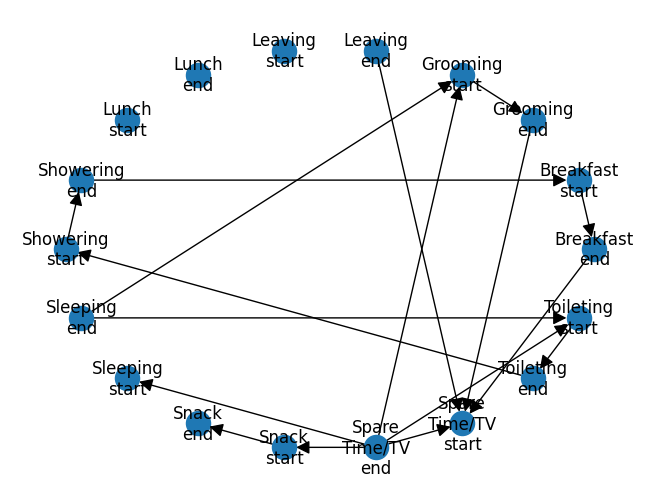

In [4]:
import networkx as nx
import matplotlib.pyplot as plt



names = dict(enumerate(map(lambda x: x.replace("_", "\n"), cat_codes.cat.categories)))
G = nx.from_numpy_array(estimated_graph, create_using=nx.DiGraph)
# Rename nodes in the graph
new_names = {node: names[node] for node in G.nodes}
G = nx.relabel_nodes(G, new_names)

pos = nx.circular_layout(G)  # Increase the scale value to increase the space between nodes
nx.draw(G, with_labels=True, arrowsize=20, pos=pos)
plt.show()

`return_alignment=True` returns, in addition, a DataFrame with the assigned cause of each event. 
- `cause_event` is the type of the cause event
- `delay` number of time-steps between cause and effect 
- `cause_index` is the DataFrame index of the cause

In [5]:
estimated_graph , aligned = cascade(df, allow_instant=True, max_delay=1000, return_alignment=True)
aligned

,event,timestamp,cause_event,delay,cause_index
0,11,0,-1,-1,-1
1,10,28212,-1,-1,-1
2,17,28405,10,193,1
3,16,28537,17,132,2
4,9,28665,16,128,3
...,...,...,...,...,...
491,16,1170135,17,75,490
492,3,1170815,6,917,489
493,2,1170931,3,116,492
494,15,1170952,2,21,493
